<a href="https://colab.research.google.com/github/Neeraj6maths/Bike-sharing-demand-prediction-regression/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone projects/Supervised ML - Regression/Bike Sharing Demand Prediction/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

No null values.

In [6]:
data.duplicated().sum()

0

No duplicate rows.

In [7]:
data.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y').dt.date

In [9]:
data['month'] = pd.to_datetime(data['Date']).dt.month
data['day_of_month'] = pd.to_datetime(data['Date']).dt.day
data.drop(columns = ['Date'], inplace = True)

In [10]:
data_copy = data.copy()
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


EDA

# Univariate analysis 

Q1) Distributiuon of each variable. 

# Bivariate analysis 

Q2) Month - wise bike count distribution \
Q3) Day wise bik dist \
Q4) hour wise bik distribution \
Q5) month, day, hour wise temp,humidity, visibilty, solar radiation, rainfall, snowfall dist. \
Q6) season wise bik dist. \
Q7) holiday wise bike dist. \
Q8) functioning day wise bike dist.



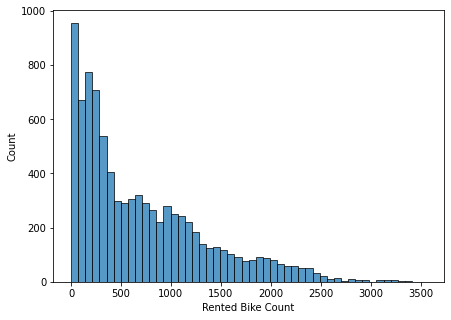

In [11]:
dep_var = 'Rented Bike Count'

plt.figure(figsize = (7,5))
sbn.histplot(data[dep_var], bins = 50)
plt.show()

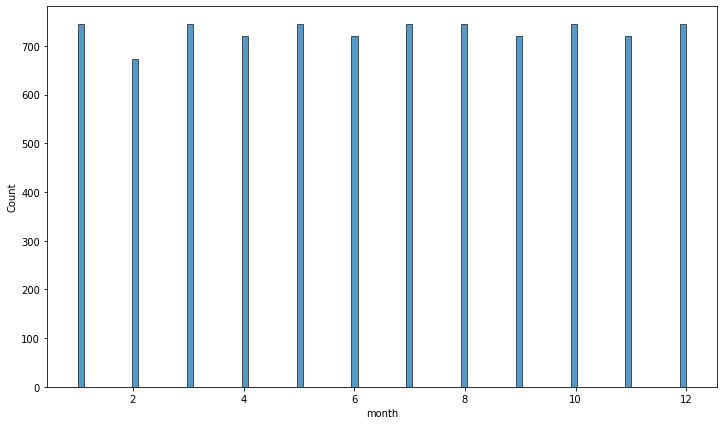

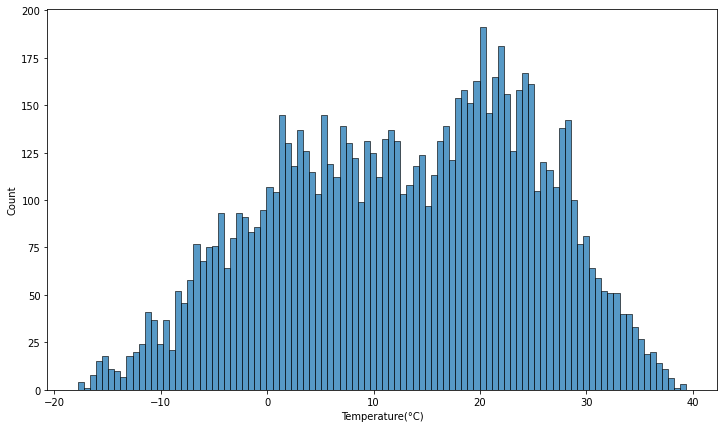

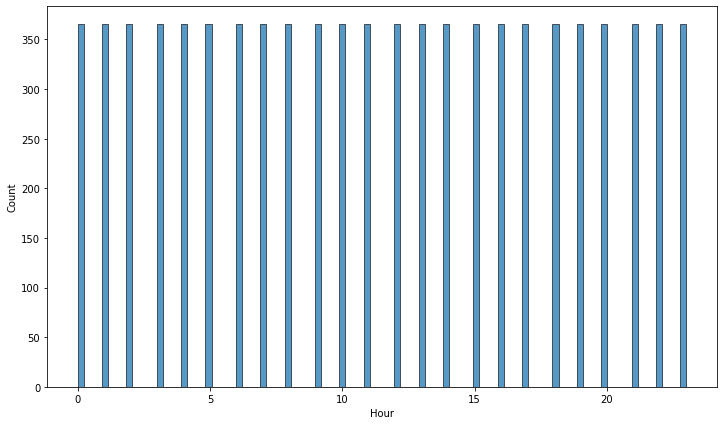

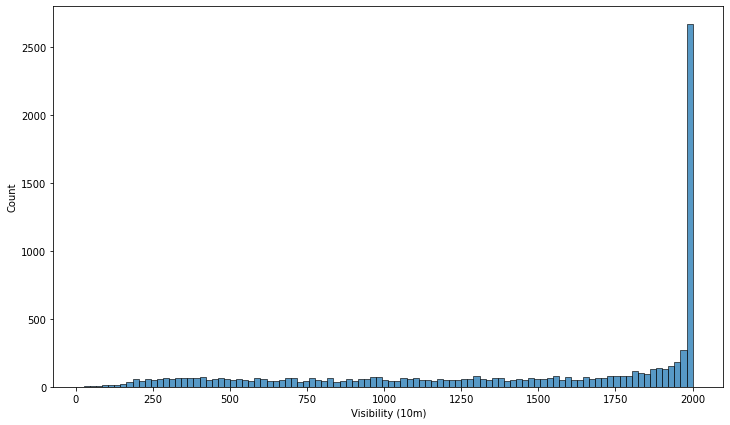

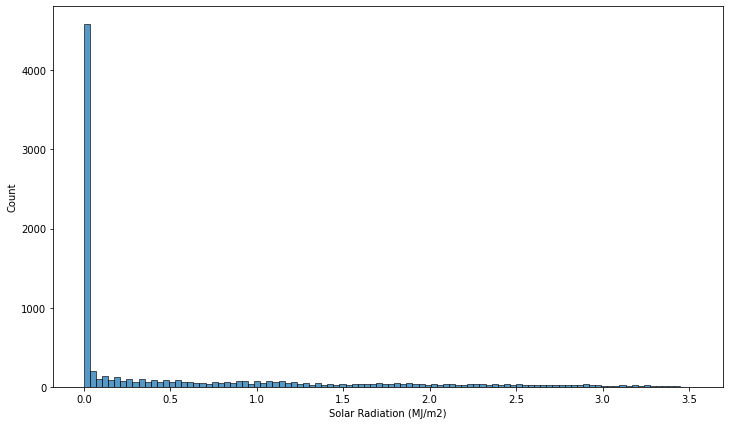

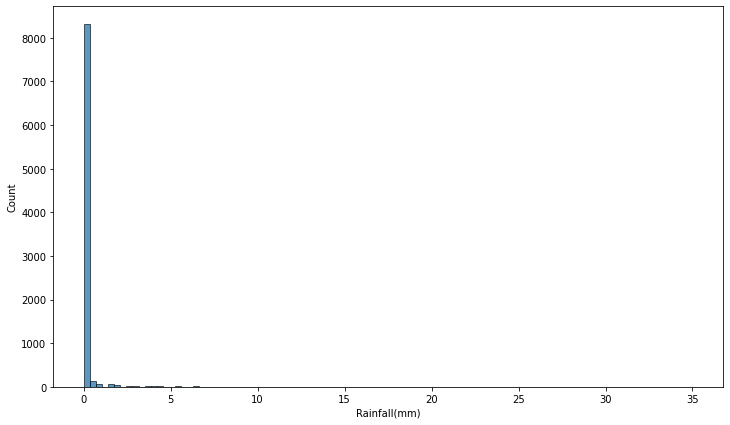

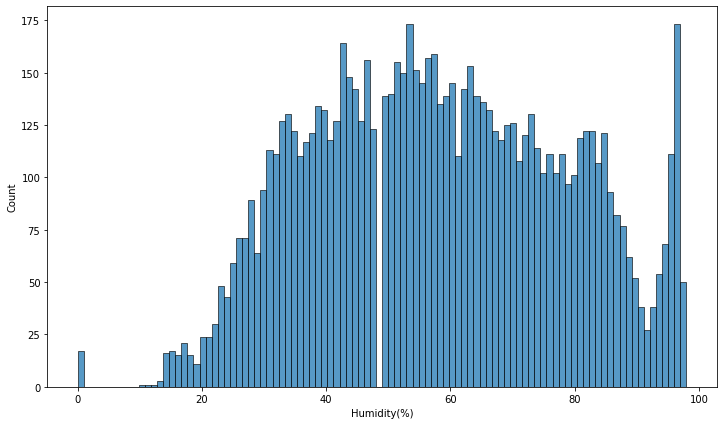

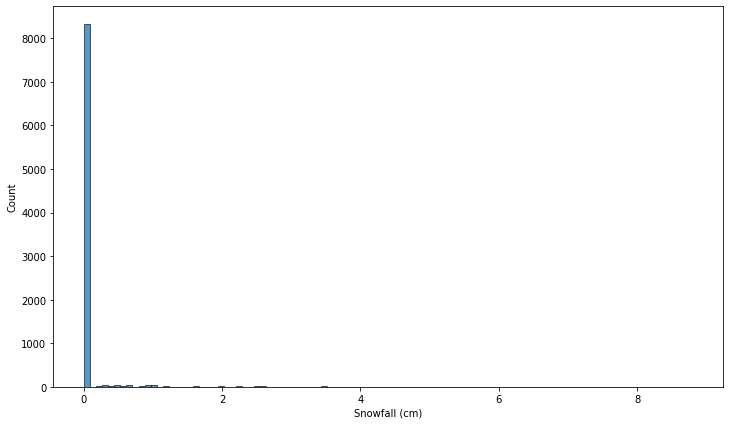

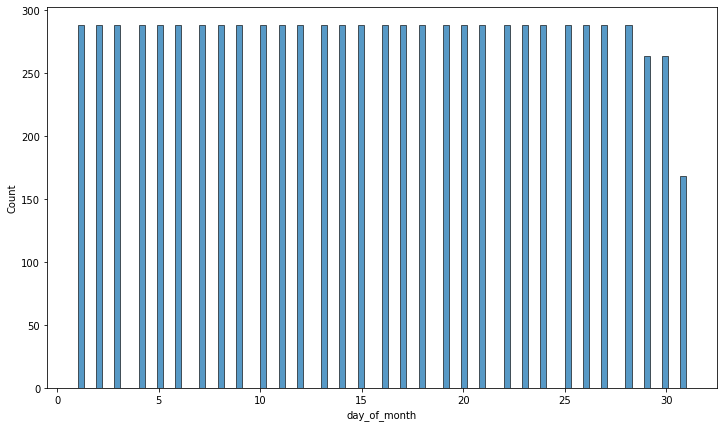

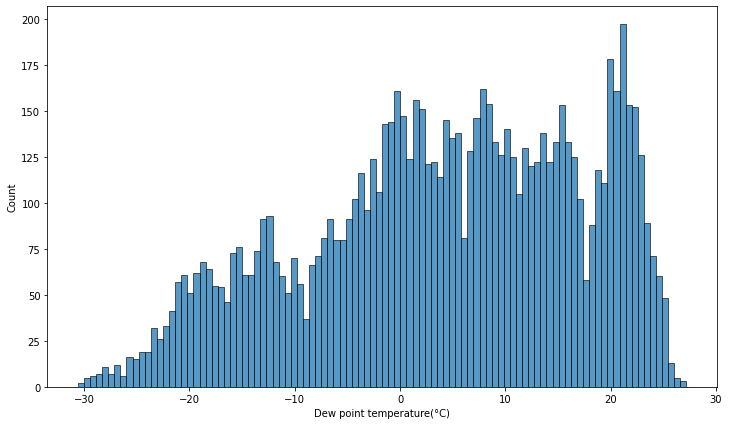

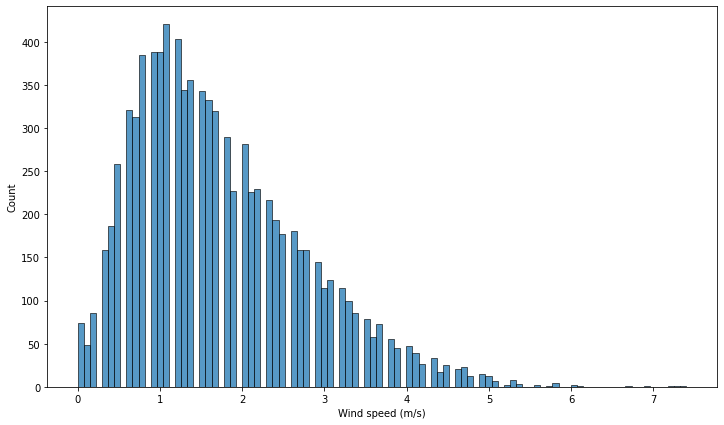

In [12]:
num_ind_var = list(set(data.describe().columns) - {dep_var})

cat_dep_var = list(set(data.columns) - set(data.describe().columns))

for col in num_ind_var:
  plt.figure(figsize = (12,7))
  sbn.histplot(data[col],bins = 100)
  plt.show()

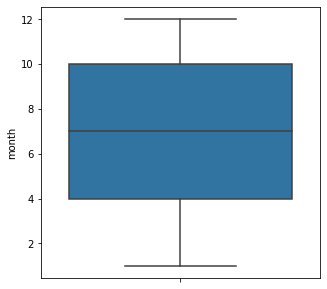

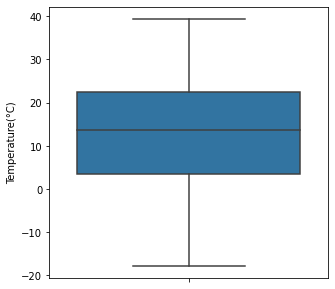

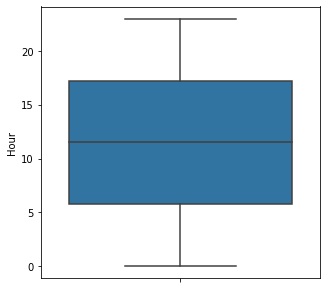

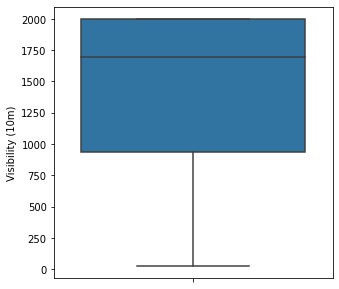

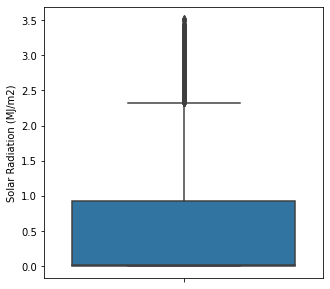

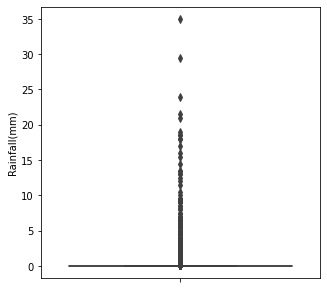

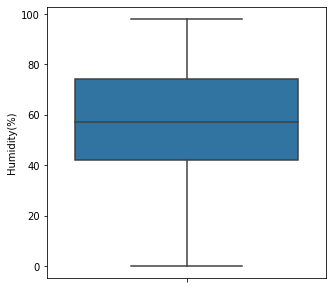

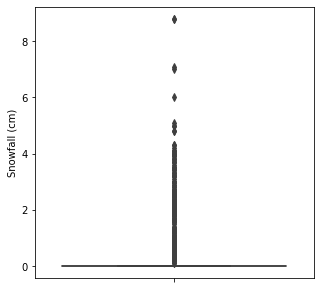

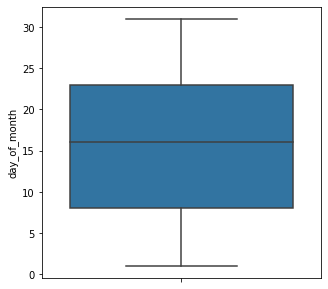

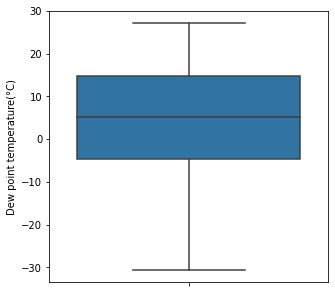

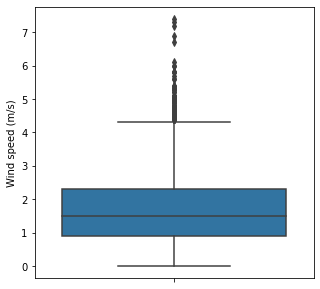

In [13]:
for col in num_ind_var:
  plt.figure(figsize = (5,5))
  sbn.boxplot(y = data[col])
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


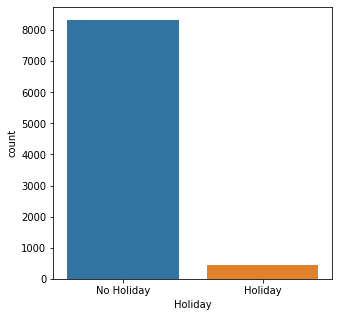

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


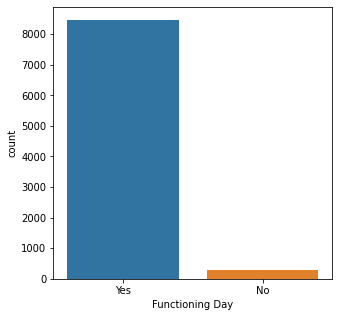

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


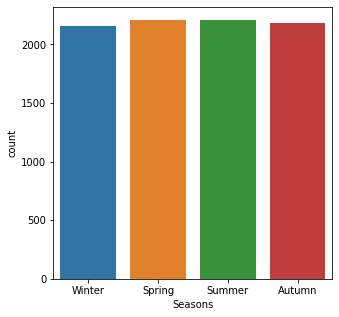

In [14]:
for col in cat_dep_var:
  plt.figure(figsize = (5,5))
  sbn.countplot(data[col])
  plt.show()

# Bivariate analysis 

Q2) Month - wise bike count distribution \
Q3) Day wise bik dist \
Q4) hour wise bik distribution \
Q5) month, day, hour wise temp,humidity, visibilty, solar radiation, rainfall, snowfall dist. \
Q6) season wise bik dist. \
Q7) holiday wise bike dist. \
Q8) functioning day wise bike dist.

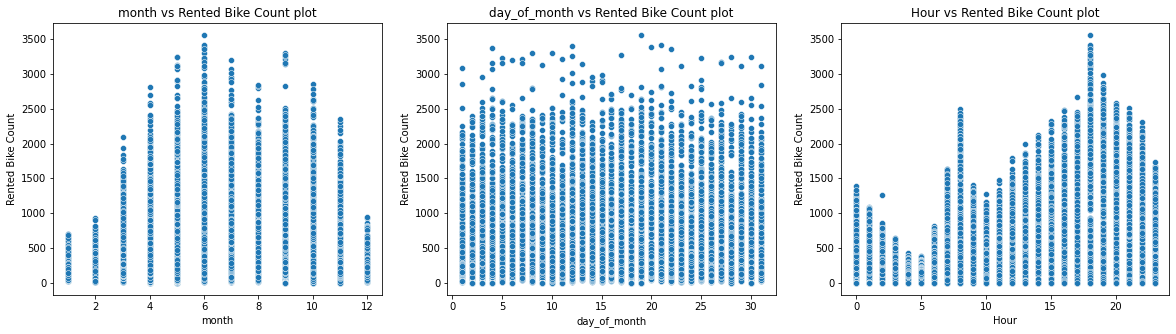

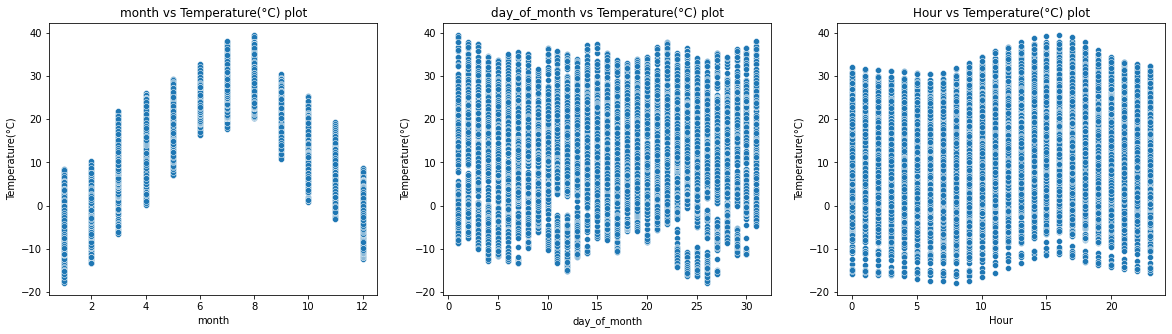

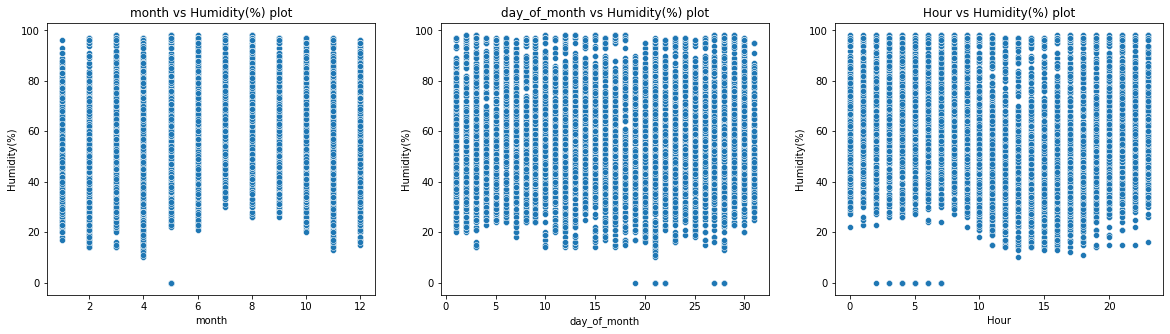

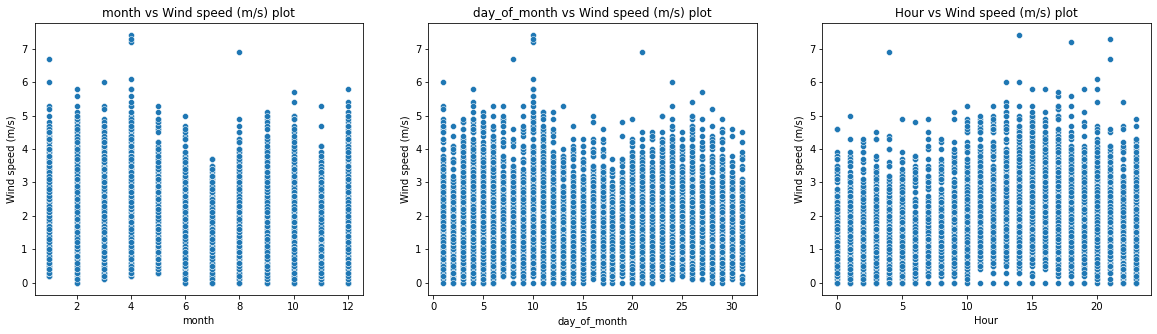

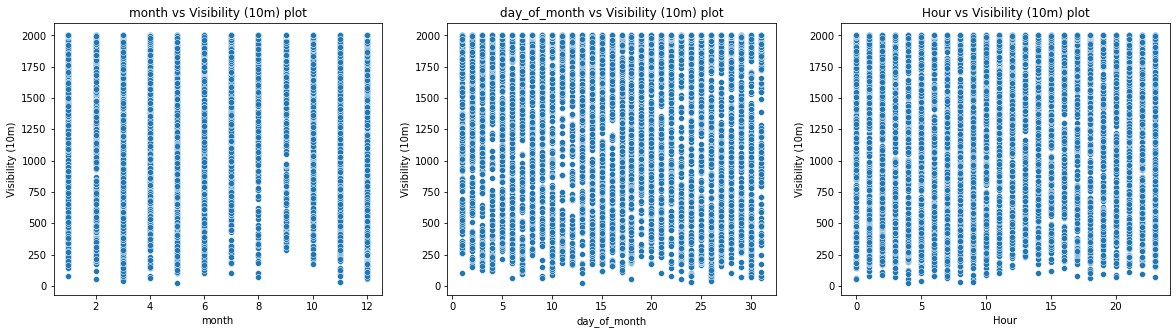

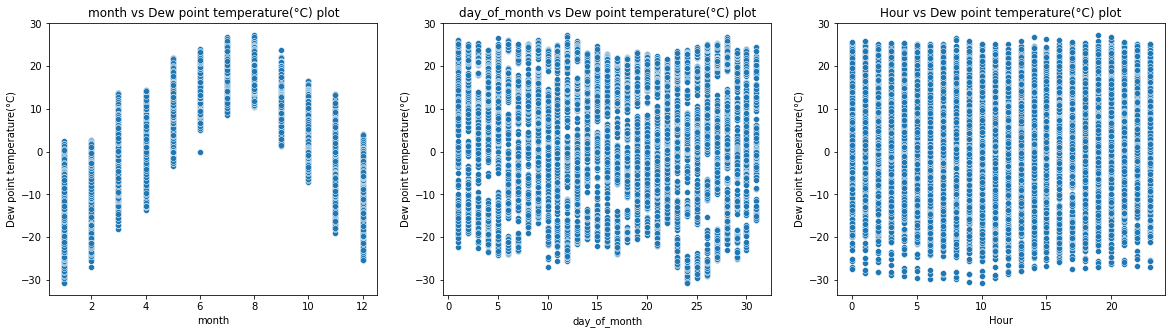

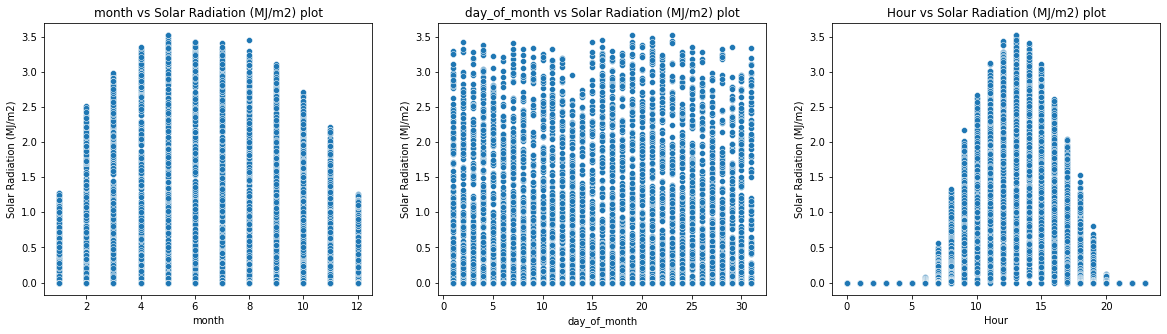

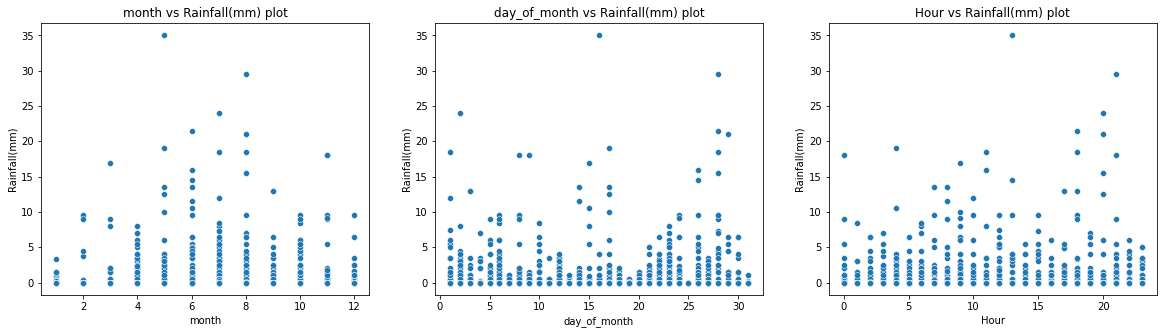

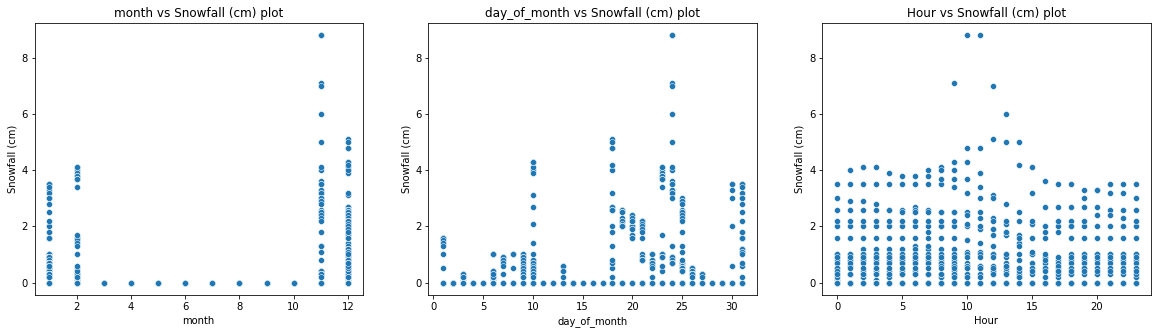

In [15]:

for col in ['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for index,col1 in enumerate(['month','day_of_month','Hour']):
      sbn.scatterplot(x = data[col1], y = data[col], ax=ax[index])
      ax[index].set_title(f"{col1} vs {col} plot")
    plt.show()
    print('\n\n\n')
    

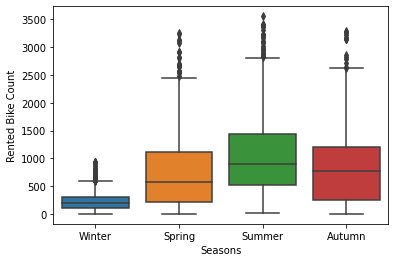

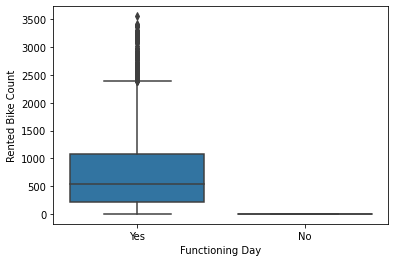

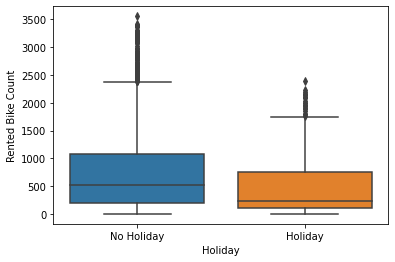

In [16]:
for col in ['Seasons','Functioning Day','Holiday']:
  sbn.boxplot(x = data[col],y = data['Rented Bike Count'])
  plt.show()

Applying Decision Tree Regressor on this dataset.

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [18]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [20]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Label encoding

In [21]:
data['Winter'] = np.where(data['Seasons']=='Winter', 1, 0)
data['Spring'] = np.where(data['Seasons']=='Spring', 1, 0)
data['Summer'] = np.where(data['Seasons']=='Summer', 1, 0)
data['Autumn'] = np.where(data['Seasons']=='Autumn', 1, 0)

# Drop the original column State from the dataframe
data.drop(columns=['Seasons'],axis=1,inplace=True)

In [22]:

holiday_l = LabelEncoder()
fday_l = LabelEncoder()


data['holiday_n'] = holiday_l.fit_transform(data['Holiday'])
data['fday_n'] = fday_l.fit_transform(data['Functioning Day'])



In [23]:
data.drop(columns = ['Holiday','Functioning Day'], inplace = True)

In [24]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_of_month,Winter,Spring,Summer,Autumn,holiday_n,fday_n
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,1,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,1,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,1,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,1,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,1,0,0,0,1,1


In [25]:
dep_var = 'Rented Bike Count'
ind_var = list(set(data.columns) - {dep_var})

In [26]:
x = data[ind_var]
y = data[dep_var]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [28]:
max_leaf_nodes = [7,9,10,15,20]
max_depth = [2,4,5]
min_samples_split = [3,5,6]

param_dict = {'max_leaf_nodes' : max_leaf_nodes,'max_depth' : max_depth,'min_samples_split' : min_samples_split}

In [29]:
regressor = DecisionTreeRegressor( random_state=0)

rf_grid = GridSearchCV(estimator=regressor,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')

rf_grid.fit(x_train, y_train)



Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=5; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=5; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=5; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=5; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=5; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=2, max_leaf_nodes=7, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 4, 5],
                         'max_leaf_nodes': [7, 9, 10, 15, 20],
                         'min_samples_split': [3, 5, 6]},
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
rf_grid.best_estimator_

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20, min_samples_split=3,
                      random_state=0)

In [31]:
rf_optimal_model = rf_grid.best_estimator_

In [32]:
y_pred = rf_optimal_model.predict(x_test)
y_train_pred = rf_optimal_model.predict(x_train)

print(f'Mean squared error of test data set : {mean_squared_error(y_test, y_pred)}')
print(f'Mean squared error of train data set : {mean_squared_error(y_train_pred,y_train)}')

print(f'R2 score of test data set : {r2_score(y_test,y_pred)}')
print(f'R2 score of train data set : {r2_score(y_train,y_train_pred)}')


Mean squared error of test data set : 125508.37544511296
Mean squared error of train data set : 113611.95535322157
R2 score of test data set : 0.698765129536723
R2 score of train data set : 0.7267669865897723


Now we will use random forest regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_regressor = RandomForestRegressor()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rf_regressor = GridSearchCV(rf_regressor, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5)


rf_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [35]:
train_preds =  rf_regressor.predict(x_train)
test_preds  = rf_regressor.predict(x_test)

In [36]:
print(f'Mean squared error of test data set : {mean_squared_error(y_test, test_preds)}')
print(f'Mean squared error of train data set : {mean_squared_error(y_train,train_preds)}')

print(f'R2 score of test data set : {r2_score(y_test,test_preds)}')
print(f'R2 score of train data set : {r2_score(y_train_pred,train_preds)}')


Mean squared error of test data set : 78775.39744459667
Mean squared error of train data set : 65422.32891757359
R2 score of test data set : 0.8109297761144734
R2 score of train data set : 0.9084312172257979


Now we will use parametric models like linear, Ridge, lasso, polynominal.

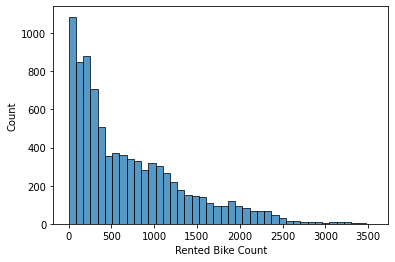

In [76]:
sbn.histplot(data['Rented Bike Count'])

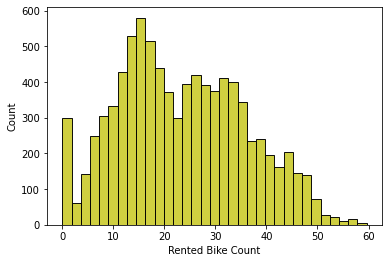

In [77]:
sbn.histplot(np.sqrt(data['Rented Bike Count']), color = 'y')
plt.show()

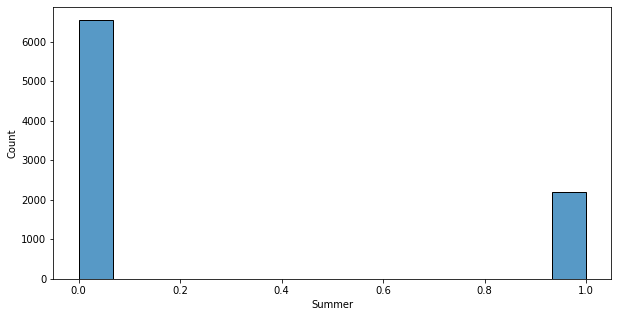

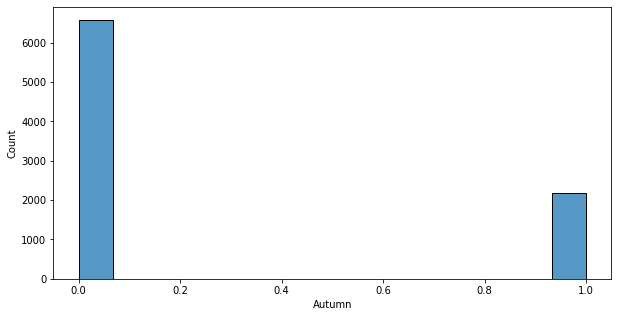

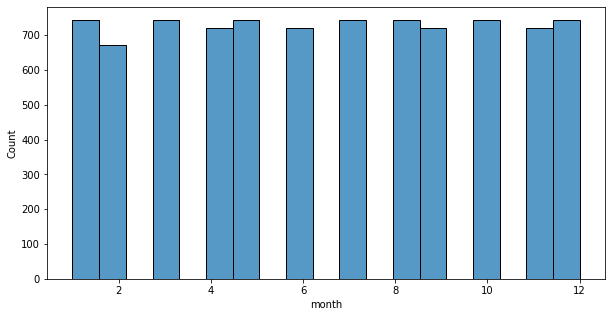

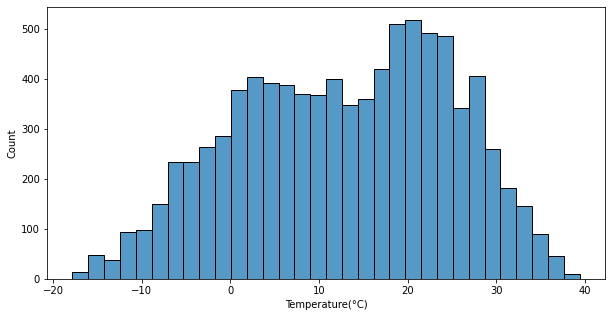

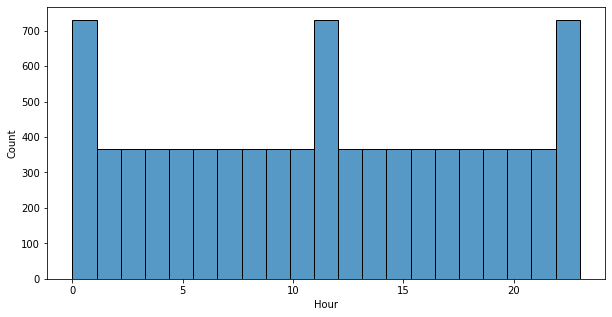

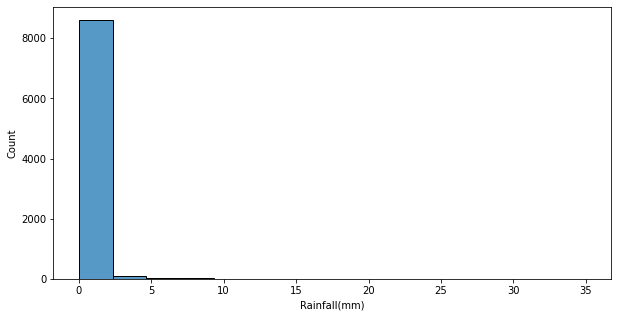

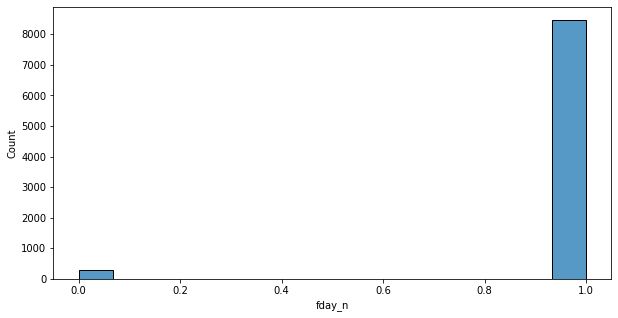

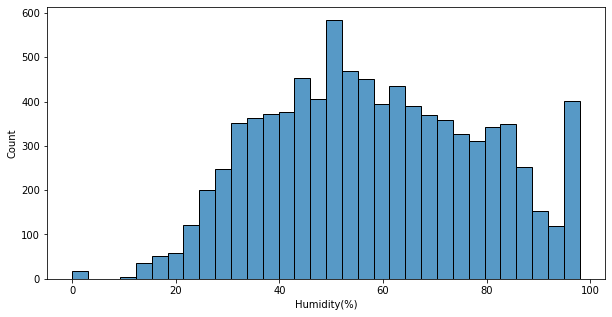

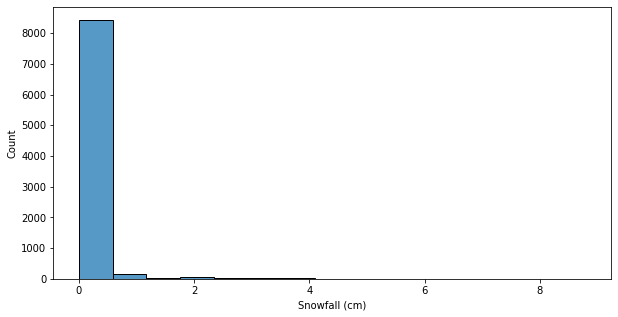

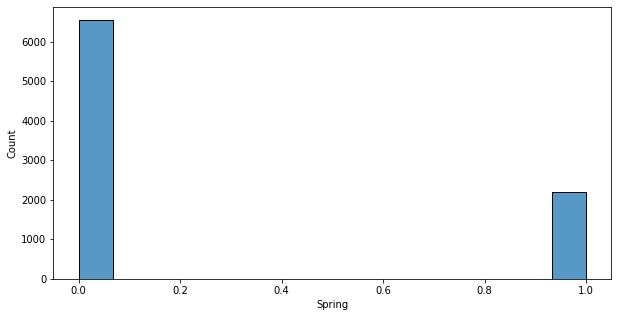

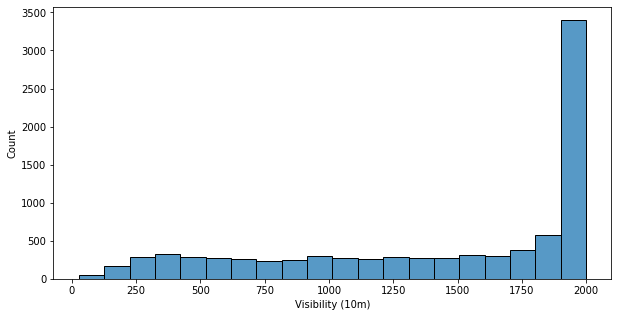

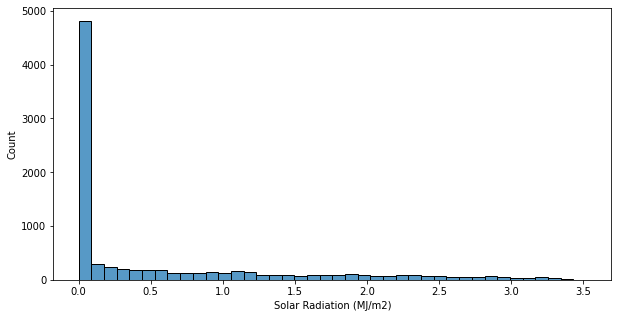

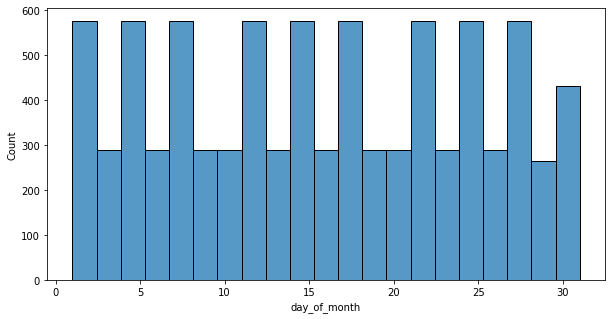

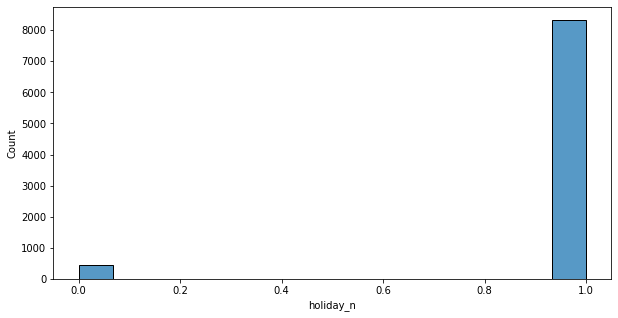

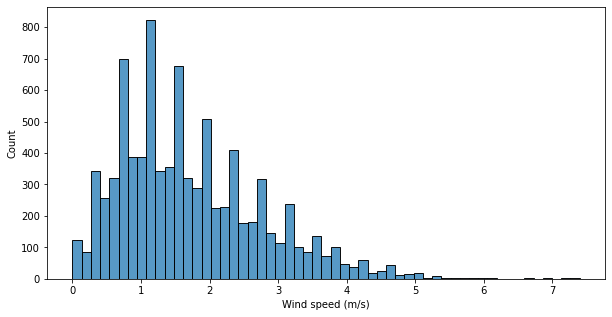

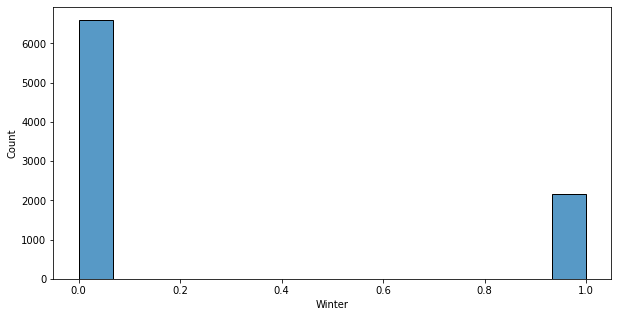

In [78]:
dep_var = 'Rented Bike Count'
ind_var = list(set(data_copy.columns) - {dep_var})

for i in ind_var:
  plt.figure(figsize = (10,5))
  sbn.histplot(data_copy[i])

In [79]:
numeric_features = data_copy.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month', 'day_of_month', 'holiday_n',
       'fday_n', 'Winter', 'Spring', 'Summer', 'Autumn'],
      dtype='object')

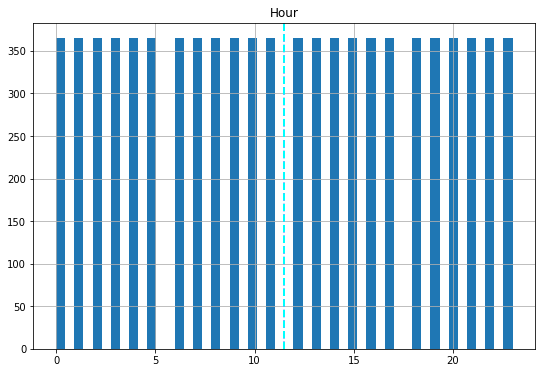

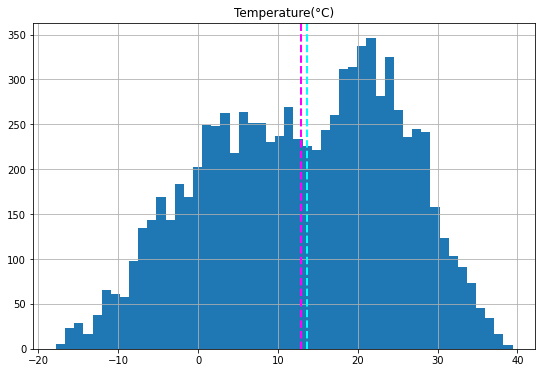

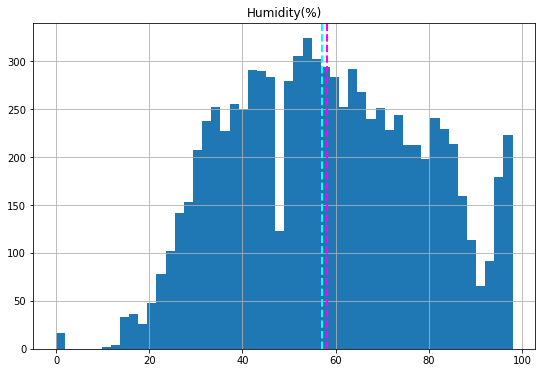

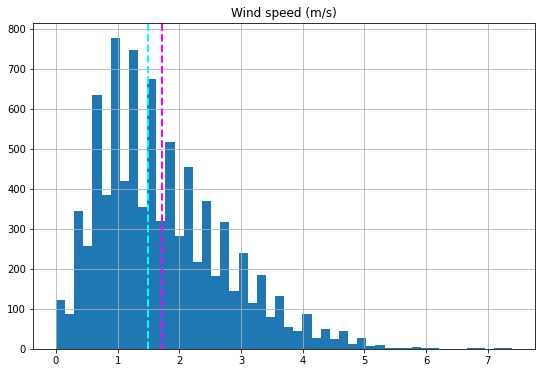

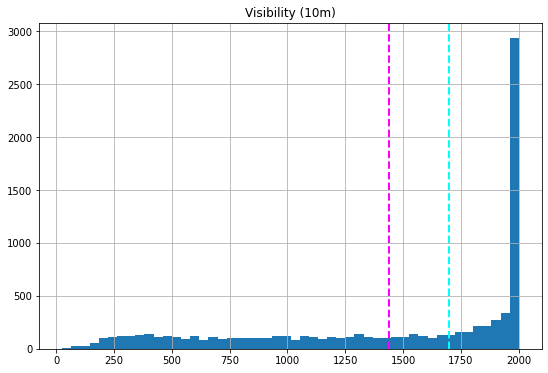

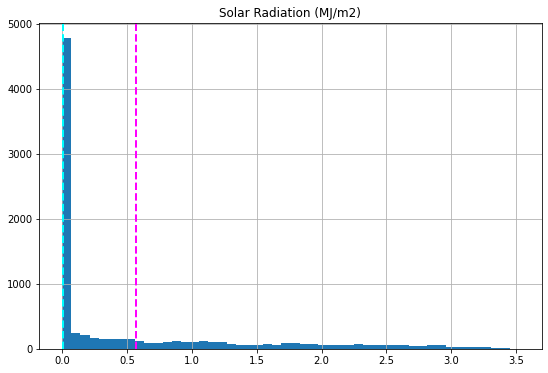

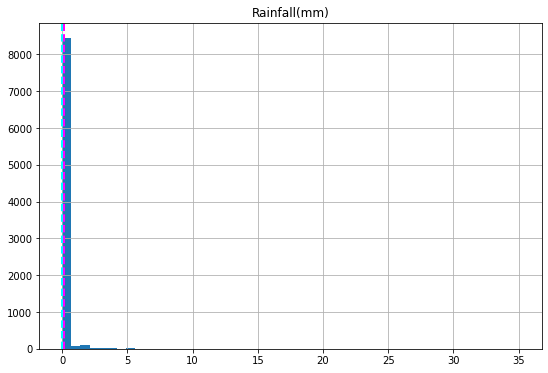

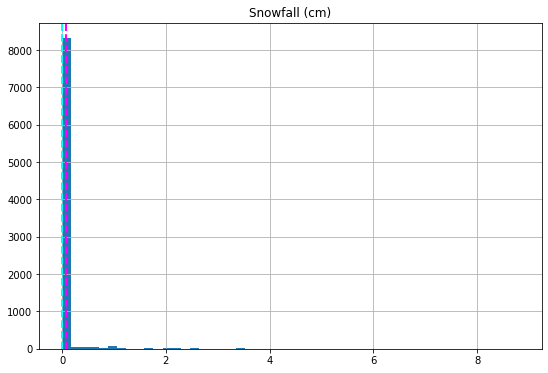

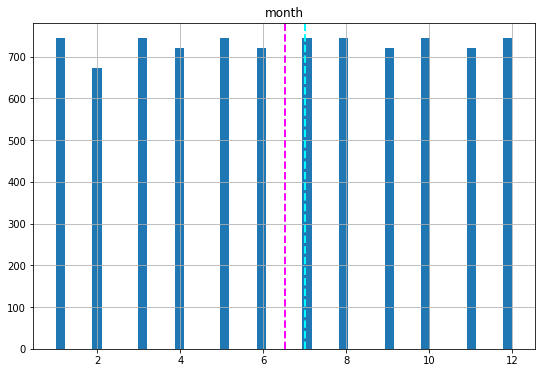

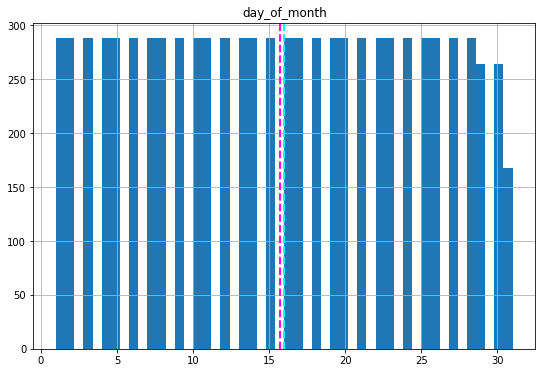

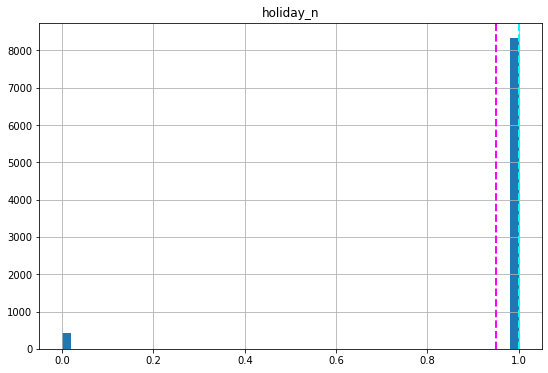

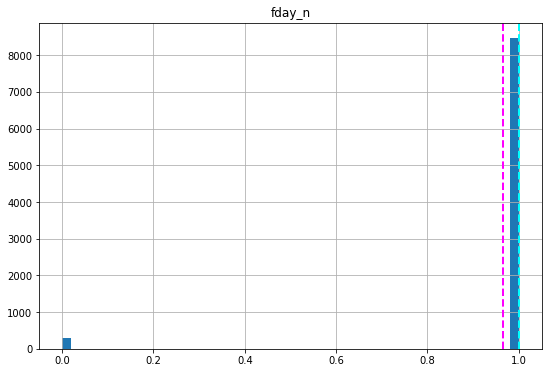

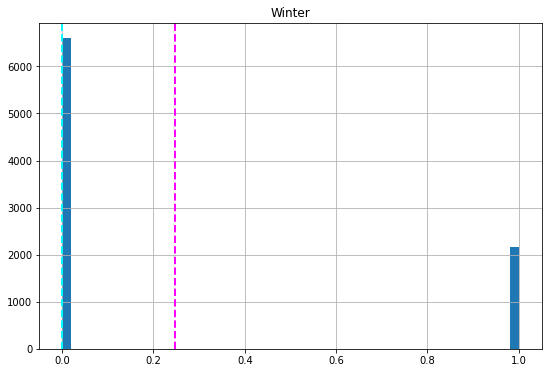

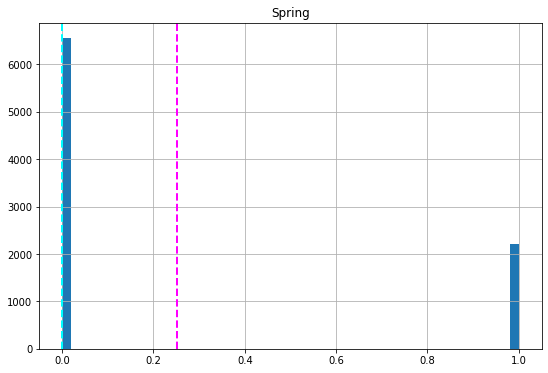

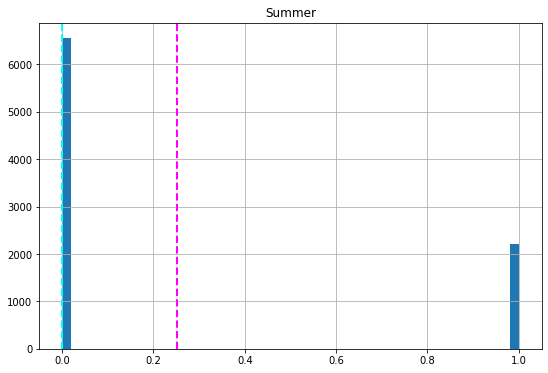

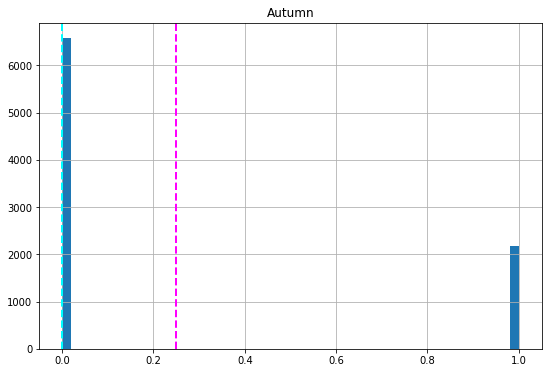

In [80]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data_copy[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


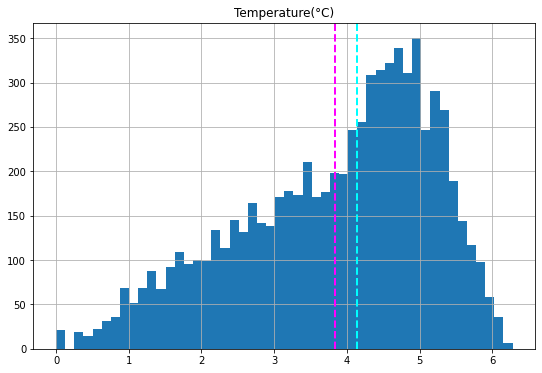

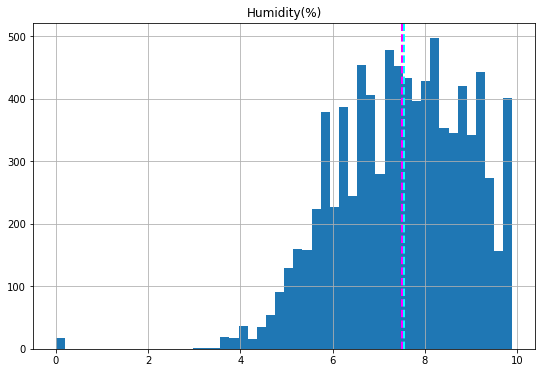

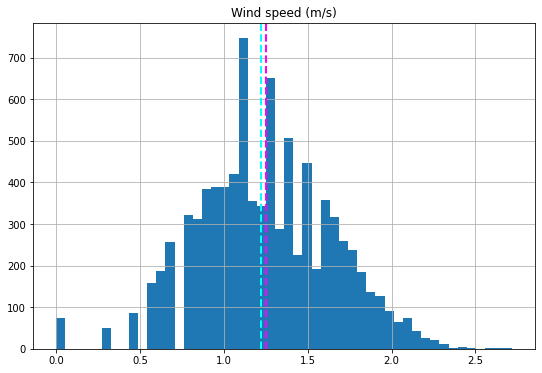

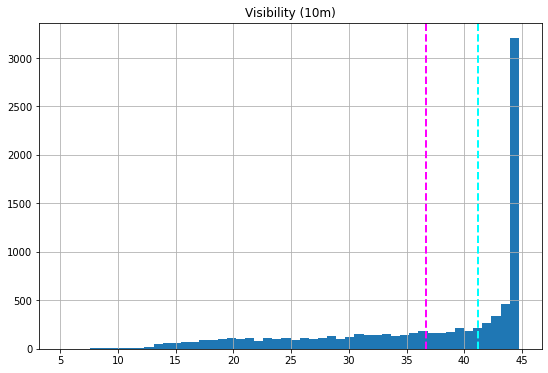

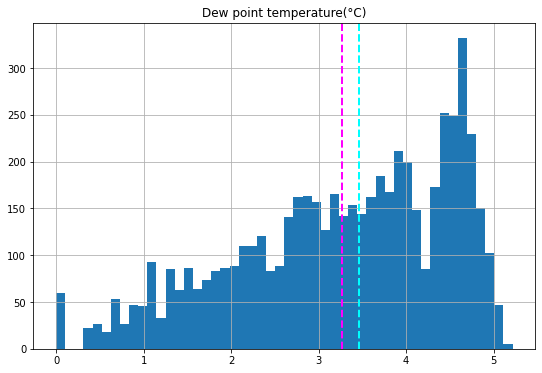

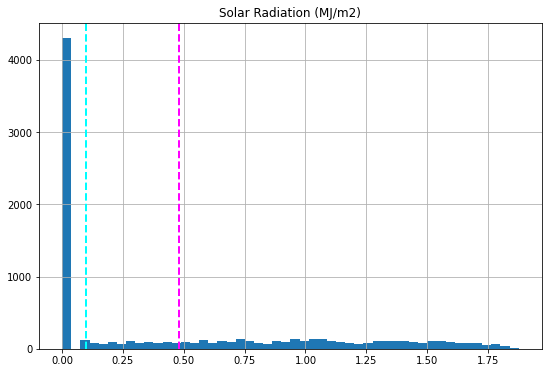

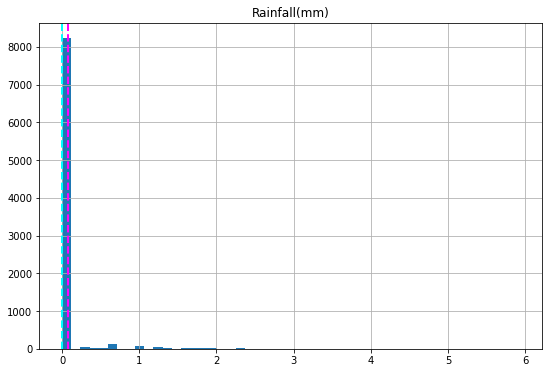

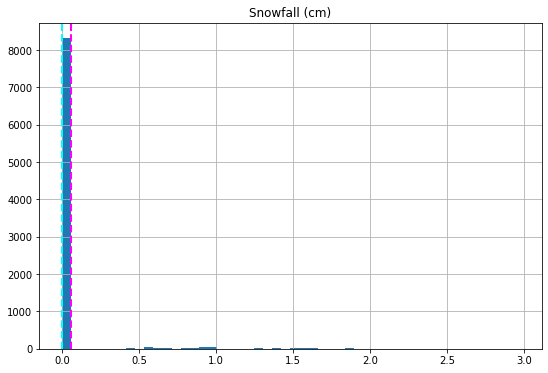

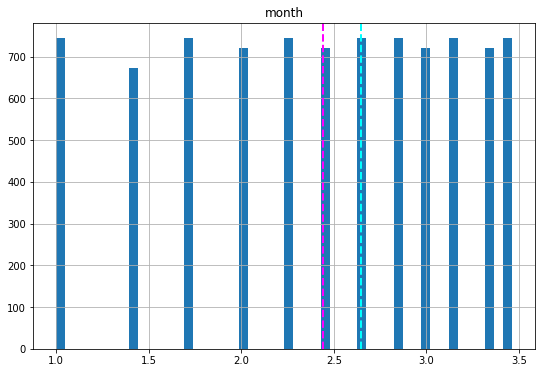

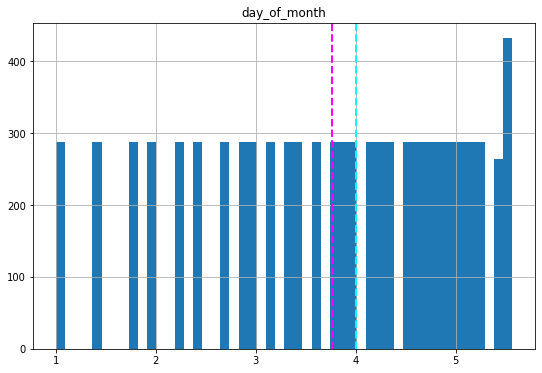

In [43]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(data_copy[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

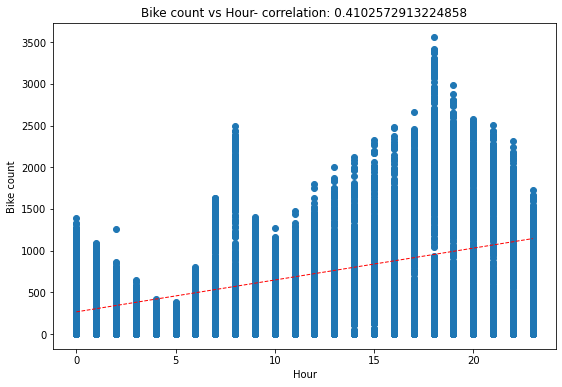

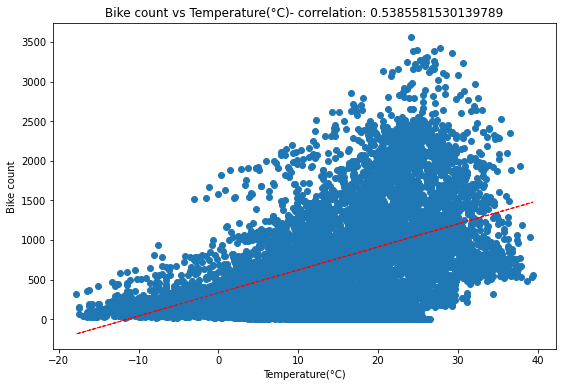

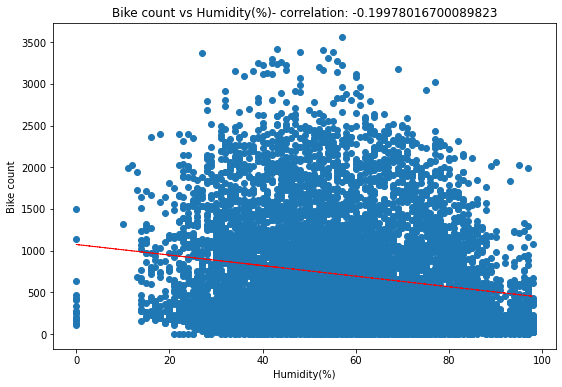

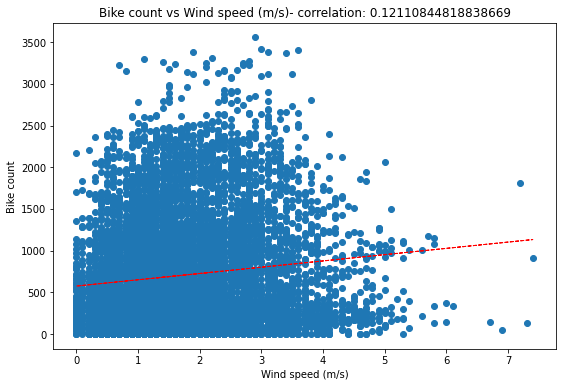

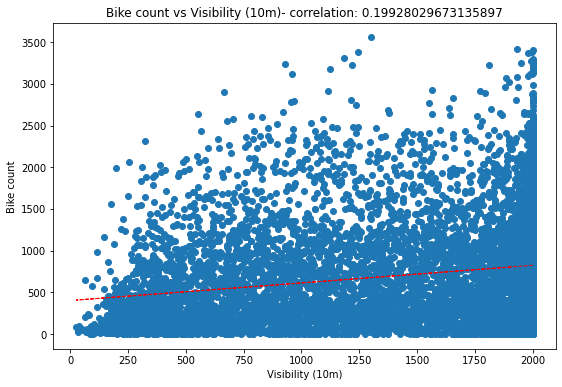

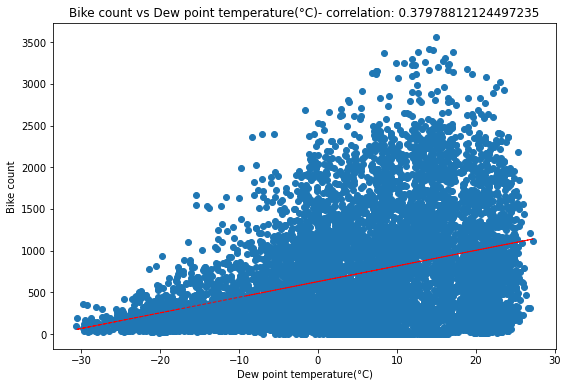

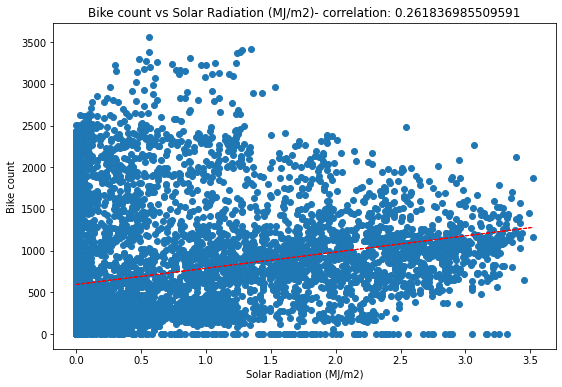

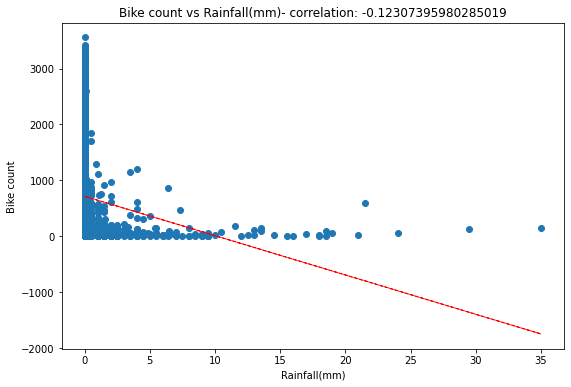

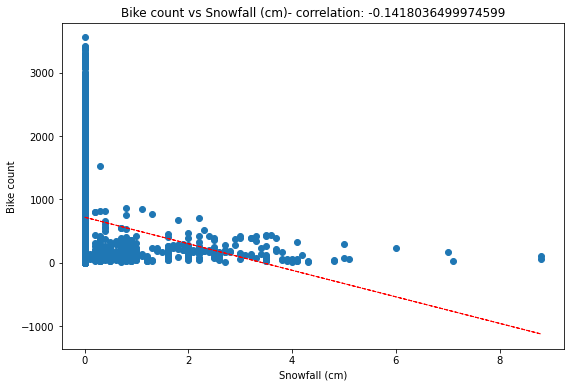

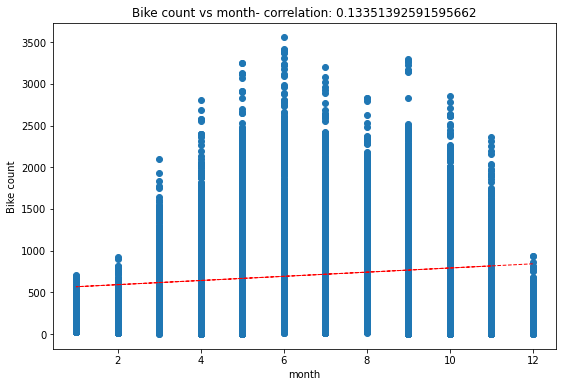

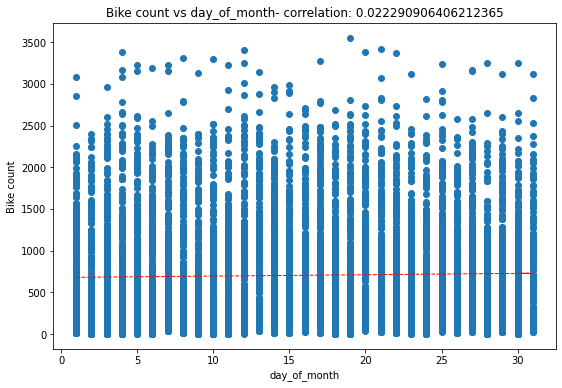

In [44]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data_copy[col]
    label = data_copy['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike count')
    ax.set_title('Bike count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data_copy[col], data_copy['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data_copy[col])

    plt.plot(data_copy[col], y_hat, "r--", lw=1)

plt.show()

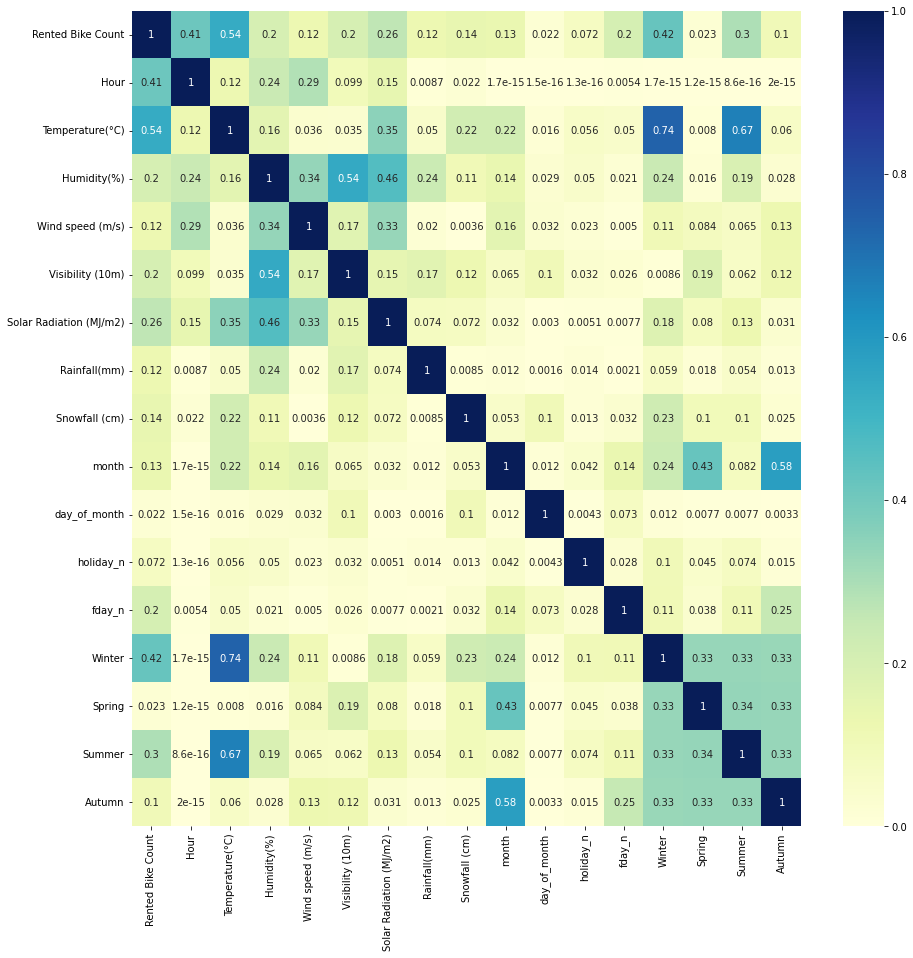

In [81]:
plt.figure(figsize = (15,15))
corr_df = data_copy.corr()

sbn.heatmap(data = np.abs(corr_df), annot = True, cmap="YlGnBu")

'Temperature' and 'Dew point temperature are highly correlated.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [83]:
calc_vif(data_copy[[i for i in data_copy.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,1.209394
1,Temperature(°C),5.069415
2,Humidity(%),2.699326
3,Wind speed (m/s),1.305278
4,Visibility (10m),1.725903
5,Solar Radiation (MJ/m2),1.956907
6,Rainfall(mm),1.070940
7,Snowfall (cm),1.140017
8,month,1.830117
9,day_of_month,1.050624


In [84]:
data_copy.drop(columns = ['Dew point temperature(°C)'],axis = 0, inplace = True)

KeyError: ignored

In [49]:
calc_vif(data_copy[[i for i in data_copy.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.997641
1,Temperature(°C),3.288024
2,Humidity(%),6.802299
3,Wind speed (m/s),4.667341
4,Visibility (10m),5.471035
5,Solar Radiation (MJ/m2),2.275006
6,Rainfall(mm),1.080689
7,Snowfall (cm),1.139759
8,month,5.027060
9,day_of_month,3.776455


In [50]:
data_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


In [51]:
data_copy['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
data_copy['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [53]:
data_copy['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [54]:
holiday_l = LabelEncoder()
fday_l = LabelEncoder()


data_copy['holiday_n'] = holiday_l.fit_transform(data_copy['Holiday'])
data_copy['fday_n'] = fday_l.fit_transform(data_copy['Functioning Day'])

In [55]:
data_copy.drop(columns = ['Functioning Day','Holiday'], inplace = True)

In [56]:
data_copy['Winter'] = np.where(data_copy['Seasons']=='Winter', 1, 0)
data_copy['Spring'] = np.where(data_copy['Seasons']=='Spring', 1, 0)
data_copy['Summer'] = np.where(data_copy['Seasons']=='Summer', 1, 0)
data_copy['Autumn'] = np.where(data_copy['Seasons']=='Autumn', 1, 0)

# Drop the original column State from the dataframe
data_copy.drop(columns=['Seasons'],axis=1,inplace=True)

In [57]:
data_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_of_month,holiday_n,fday_n,Winter,Spring,Summer,Autumn
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,1,1,1,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,1,1,1,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,1,1,1,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,1,1,1,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,1,1,1,0,0,0


In [58]:
features = list(set(data_copy.columns) - {'Rented Bike Count'})

In [59]:
from scipy.stats import zscore

X = data_copy[features].apply(zscore)

In [60]:
y = np.sqrt(data_copy['Rented Bike Count'])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [63]:
reg.score(x_train, y_train)

0.6572111222137187

In [64]:
y_pred = reg.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 181512.78487657008
RMSE : 426.0431725501185


In [66]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.5643479564944738
Adjusted R2 :  0.5603304160356333


Lasso

In [67]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+04, tolerance: 9.855e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.895e+04, tolerance: 9.828e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.558055774066396


In [69]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [70]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_lasso)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 181527.55435782106
RMSE : 426.0605055127981
R2 : 0.5643125080014495
Adjusted R2 :  0.5602946406400796


Ridge

In [71]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [72]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -53.572323984111996


In [73]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [74]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_ridge)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 181476.38359566242
RMSE : 426.0004502294128
R2 : 0.5644353238522299
Adjusted R2 :  0.5604185890866021


Elastic net

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
en_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error', cv=10)
en_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+05, tolerance: 9.855e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+05, tolerance: 9.828e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

KeyboardInterrupt: ignored

In [ ]:
print("The best fit alpha value is found out to be :" ,en_regressor.best_params_)
print("\nUsing ",en_regressor.best_params_, " the negative mean squared error is: ", en_regressor.best_score_)

In [ ]:
y_pred_en = en_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_en)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_en)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_en)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

max_deg = 10
n = X.shape[1]
for i in range(max_deg+1):
  poly = PolynomialFeatures(degree = n+i)
  X_poly = poly.fit_transform(X)

  x_train, x_test, y_train, t_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
  lin2 = LinearRegression()
  lin2.fit(x_train, y_train)
  y_pred = lin2.predict(y_test)
  y_train_pred = lin2.predict(y_train)
  print(f"MSE for train data : {mean_squared_error((y_train_pred)**2,(y_train)**2)}")
  print(f"MSE for test data : {mean_squared_error((y_pred)**2,(y_test)**2)}")
  print(f"R2 score for train data : {R2_score((y_train_pred)**2,(y_train)**2)}")
  print(f"R2score for test data : {R2_score((y_pred)**2,(y_test)**2)} \n\n")